# Project: Wrangling and Analyze Data

In [361]:
#importing libraries
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import re

## Data Gathering

1. Downloading WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [362]:
#Here I am reading a csv file using pandas and displaying the first 5 rows
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [363]:
# Download the image predictions file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save the file
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

3. Using json to read (tweet-json.txt) file and adding it to a pandas dataframe

In [364]:
#Making a list to add tweets to

tweets = []
#Reading the file
with open("tweet-json.txt", "r") as file:
  #Looping through each tweet and adding it through json to the tweets list
  for tweet in file:
    tweets.append(json.loads(tweet))

#Turning the tweets list to a pandas DataFrame
tweets_df = pd.DataFrame(tweets)

## Assessing Data

In [365]:
#Viziually assesing the dataset
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN


In [366]:
#Information
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [367]:
#Statistics
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [368]:
#Checking for duplicates
twitter_archive.duplicated().value_counts()

False    2356
Name: count, dtype: int64

In [369]:
#Here I got all names in a variable
unique_names = twitter_archive['name'].unique()
unique_names

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune

In [370]:
#Here I am filling all na values because islower() function doesn't take NaNs
twitter_archive_full = twitter_archive['name'].fillna('')
#Checking for invalid names
invalid_names = twitter_archive_full[twitter_archive_full.str.islower()]
invalid_names

22       such
56          a
118     quite
169     quite
193     quite
        ...  
2349       an
2350        a
2352        a
2353        a
2354        a
Name: name, Length: 109, dtype: object

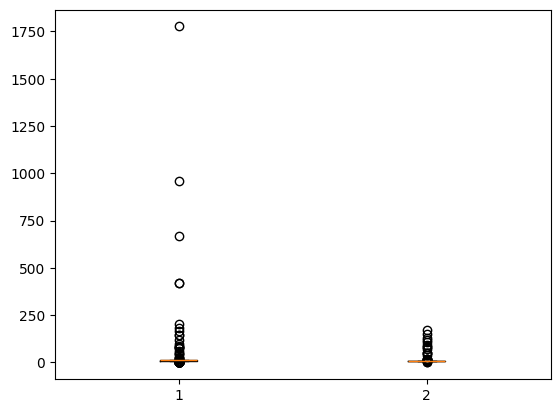

In [371]:
#Here I am getting only these 2 columns because I don't need other columns
rating_numerator = twitter_archive.rating_numerator
rating_denominator = twitter_archive.rating_denominator
#Checking for Outlier
plt.boxplot([rating_numerator, rating_denominator])
plt.show()

In [372]:
#I wanted to have a look over these
rating_numerator.value_counts()

rating_numerator
12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: count, dtype: int64

In [373]:
#I wanted to have a look here too
rating_denominator.value_counts()

rating_denominator
10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: count, dtype: int64

In [374]:
#Viziually assesing the dataset
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [375]:
#information
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [376]:
#statistics
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [377]:
#Checking for duplicates
image_predictions.duplicated().value_counts()

False    2075
Name: count, dtype: int64

In [378]:
#Viziually assesing the dataset
tweets_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8853,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,6514,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,4328,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,8964,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,9774,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


In [379]:
#Information
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [380]:
#Statistics
tweets_df.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.354000e+03,7.800000e+01,7.800000e+01,2354.000000,2354.000000,2.900000e+01
mean,7.426978e+17,7.455079e+17,2.014171e+16,3164.797366,8080.968564,8.162686e+17
std,6.852812e+16,7.582492e+16,1.252797e+17,5284.770364,11814.771334,6.164161e+16
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000,6.721083e+17
25%,6.783975e+17,6.757419e+17,3.086374e+08,624.500000,1415.000000,7.888183e+17
50%,7.194596e+17,7.038708e+17,4.196984e+09,1473.500000,3603.500000,8.340867e+17
75%,7.993058e+17,8.257804e+17,4.196984e+09,3652.000000,10122.250000,8.664587e+17
max,8.924206e+17,8.862664e+17,8.405479e+17,79515.000000,132810.000000,8.860534e+17


In [381]:
#Checking for languages
tweets_df['lang'].value_counts()

lang
en     2336
und       7
in        3
nl        3
eu        1
es        1
tl        1
ro        1
et        1
Name: count, dtype: int64

### Quality issues
1. Inconsistent Rating Denominator

2. Duplicate columns

3. Unwanted Languages

4. Unused Columns

5. Missing Values

6. Outliers Ratings

7. invalid Dog Names

8. HTML Tags

9. Inconsistent Column Name

10. Wrong Data Types

11. Retweets And Replies

### Tidiness issues

1. Unmerged Tables

2. Untidy Dog Stages

## Cleaning Data

In [382]:
# Make copies of original pieces of data
twitter_archive_copy = twitter_archive.copy()
image_predictions_copy = image_predictions.copy()
tweets_df_copy = tweets_df.copy()

### Issue #1: Inconsistent Column Name

#### Define: The name of the id column doesn't match other datasets which can cause problems in merging

#### Code

In [383]:
#here I am renaming the id column to match other datasets
tweets_df_copy.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [384]:
tweets_df_copy['tweet_id']

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2349    666049248165822465
2350    666044226329800704
2351    666033412701032449
2352    666029285002620928
2353    666020888022790149
Name: tweet_id, Length: 2354, dtype: int64

### Issue #2: Unmerged Tables

#### Define: There are alot of tables that can be merged into 1 master dataset

#### Code

In [385]:
# Merging the datasets
master_df = pd.merge(twitter_archive_copy, image_predictions_copy, on='tweet_id', how='outer')
master_df = pd.merge(master_df, tweets_df_copy, on='tweet_id', how='outer')

#### Test

In [386]:
pd.set_option("display.max_columns", None)
master_df.head()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,id_str,full_text,truncated,display_text_range,entities,extended_entities,source_y,in_reply_to_status_id_y,in_reply_to_status_id_str,in_reply_to_user_id_y,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1.0,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Sun Nov 15 22:32:08 +0000 2015,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,532.0,2535.0,False,False,False,False,en,NaN,NaN,NaN,NaN
1,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1.0,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,48.0,132.0,False,False,False,False,en,NaN,NaN,NaN,NaN
2,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1.0,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,47.0,128.0,False,False,False,False,en,NaN,NaN,NaN,NaN
3,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1.0,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'na...",None,None,None,None,False,147.0,311.0,False,False,False,False,en,NaN,NaN,NaN,NaN


### Issue #3: Retweets And Replies

#### Define: Tweets And Replies are bad because they make bad analysis so we remove them

#### Code

In [387]:
# To remove the retweet
master_df = master_df[master_df['retweeted_status_id'].isnull()]
# To remove the replies
master_df = master_df[master_df['in_reply_to_status_id_x'].isnull()]

#### Test

In [388]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2355
Data columns (total 58 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2097 non-null   int64  
 1   in_reply_to_status_id_x        0 non-null      float64
 2   in_reply_to_user_id_x          0 non-null      float64
 3   timestamp                      2097 non-null   object 
 4   source_x                       2097 non-null   object 
 5   text                           2097 non-null   object 
 6   retweeted_status_id            0 non-null      float64
 7   retweeted_status_user_id       0 non-null      float64
 8   retweeted_status_timestamp     0 non-null      object 
 9   expanded_urls                  2094 non-null   object 
 10  rating_numerator               2097 non-null   int64  
 11  rating_denominator             2097 non-null   int64  
 12  name                           1494 non-null   object

### Issue #4: Unused Columns

#### Define: Columns that we don't use and probably will not use

#### Code

In [389]:
master_df = master_df.drop(['in_reply_to_status_id_x', 'in_reply_to_user_id_x', 'retweeted_status_id',
                             'retweeted_status_user_id', 'retweeted_status_timestamp', 'favorited', 'retweeted',
                             'possibly_sensitive', 'possibly_sensitive_appealable', 'place', 'contributors',
                             'is_quote_status', 'retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status',
                             'in_reply_to_status_id_str', 'in_reply_to_user_id_y', 'in_reply_to_user_id_str', 'in_reply_to_screen_name',
                             'geo', 'user', 'coordinates', 'extended_entities', 'entities', 'display_text_range', 'source_y',
                              'in_reply_to_status_id_y', 'p3_conf', 'p3_dog', 'created_at', 'created_at', 'p1_dog', 'p2_dog', 'p2_conf',
                              'truncated', 'img_num', 'p1_conf', 'p2', 'p3'], axis = 1)

#### Test

In [390]:
master_df.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,p1,id_str,full_text,retweet_count,favorite_count,lang
0,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,666020888022790149,Here we have a Japanese Irish Setter. Lost eye...,532.0,2535.0,en
1,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,666029285002620928,This is a western brown Mitsubishi terrier. Up...,48.0,132.0,en
2,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,666033412701032449,Here is a very happy pup. Big fan of well-main...,47.0,128.0,en
3,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,147.0,311.0,en
4,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,41.0,111.0,en


### Issue #5: Duplicate columns

#### Define: duplicated columns around the dataset (before merging both datasets there were duplicate columns in one dataset)

#### Code

In [391]:
master_df = master_df.drop(['id_str', 'full_text'], axis=1)

#### Test

In [392]:
master_df.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,p1,retweet_count,favorite_count,lang
0,666020888022790149,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,532.0,2535.0,en
1,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,48.0,132.0,en
2,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,47.0,128.0,en
3,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,147.0,311.0,en
4,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,41.0,111.0,en


### Issue #6: Missing Values

#### Define: Missing Values around the dataset that we are gonna handle

#### Code

In [393]:
#I didn't use inplace because there was an error out of my knowledge
master_df[master_df.columns[14:16]] = master_df[master_df.columns[14:16]].fillna(0)
master_df[['expanded_urls', 'name', 'jpg_url', 'p1', 'lang']] = master_df[['expanded_urls', 'name', 'jpg_url', 'p1', 'lang']].fillna('unknown')
master_df[master_df.columns[8:12]] = master_df[master_df.columns[8:12]].fillna('none')

#### Test

In [394]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source_x            2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2097 non-null   object 
 5   rating_numerator    2097 non-null   int64  
 6   rating_denominator  2097 non-null   int64  
 7   name                2097 non-null   object 
 8   doggo               2097 non-null   object 
 9   floofer             2097 non-null   object 
 10  pupper              2097 non-null   object 
 11  puppo               2097 non-null   object 
 12  jpg_url             2097 non-null   object 
 13  p1                  2097 non-null   object 
 14  retweet_count       2097 non-null   float64
 15  favorite_count      2097 non-null   float64
 16  lang       

### Issue #7: Wrong Data Types

#### Define: Wrong data types around the dataset

#### Code

In [395]:
master_df['timestamp'] = pd.to_datetime(master_df['timestamp'])
master_df['tweet_id'] = master_df['tweet_id'].astype(str)
master_df['retweet_count'] = master_df['retweet_count'].astype(int)
master_df['favorite_count'] = master_df['favorite_count'].astype(int)

#### Test

In [396]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source_x            2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2097 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
 12  jpg_url             2097 non-null   obj

### Issue #8: HTML Tags

#### Define: HTML tags in source column

#### Code

In [397]:
#Function to remove HTML tags
def remove_html_tags(source):
    cleaning = re.compile('<.*?>')
    return re.sub(cleaning, '', source)

#Applying the function to the source column
master_df['source_x'] = master_df['source_x'].apply(remove_html_tags)

#### Test

In [398]:
master_df.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,p1,retweet_count,favorite_count,lang
0,666020888022790149,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,unknown,none,none,none,none,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,532,2535,en
1,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,none,none,none,none,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,48,132,en
2,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,none,none,none,none,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,47,128,en
3,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,none,none,none,none,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,147,311,en
4,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,unknown,none,none,none,none,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,41,111,en


### Issue #9: Invalid Dog Names

#### Define: Dog names that are probably not true

#### Code

In [399]:
#Here I used a variable that i created in assessing phase, this variable contains all lowercase names
#I used lambda for good results instead of using a for loop
master_df['name'] = master_df['name'].apply(lambda x: 'unknown' if x in invalid_names.values else x)

#### Test

In [400]:
master_df['name'].value_counts()

name
unknown    707
Charlie     11
Lucy        11
Oliver      10
Cooper      10
          ... 
Trip         1
Ferg         1
Lucky        1
Ricky        1
Tilly        1
Name: count, Length: 930, dtype: int64

### Issue #10: Inconsistent Rating Denominator

#### Define: Rating denominator values are not equal with makes the data dirty

#### Code

In [401]:
#Filtering the DataFrame to keep rows where rating_denominator equal 10
master_df = master_df[master_df['rating_denominator'] == 10]

#### Test

In [402]:
master_df['rating_denominator'].value_counts()

rating_denominator
10    2080
Name: count, dtype: int64

### Issue #11: Outliers Ratings

#### Define: Ratings nums are very big which is bad for statistics

#### Code

In [403]:
#Flitering the dataset to delete outlier rows
master_df = master_df[master_df['rating_numerator'] <= 15]


#### Test

In [404]:
master_df['rating_numerator'].value_counts()

rating_numerator
12    486
10    436
11    413
13    287
9     152
8      98
7      51
14     38
5      34
6      32
3      19
4      15
2       9
1       4
0       1
Name: count, dtype: int64

### Issue #12: Unwanted Languages

#### Define: Tweets with unwanted languages, we only need English ones

#### Code

In [405]:
#Filtering the DataFrame to keep rows where lang is english
master_df = master_df[master_df['lang'] == 'en']


#### Test

In [406]:
master_df['lang'].value_counts()

lang
en    2067
Name: count, dtype: int64

### Issue #13: Untidy Dog Stages

#### Define: Dog stages should be united under 1 column

#### Code

In [407]:
#Creating a conditional function that checks on 4 stages
def dog_stages(row):
  if row['doggo'] == 'doggo':
    return 'doggo'
  elif row['floofer'] == 'floofer':
    return 'floofer'
  elif row['pupper'] == 'pupper':
    return 'pupper'
  elif row['puppo'] == 'puppo':
    return 'puppo'
  else:
    return 'None'

#Creating a new column called dog_stage
master_df['dog_stage'] = master_df.apply(dog_stages, axis=1)

#Dropping the original dog stage columns
master_df = master_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)


#### Test

In [408]:
#seeing a sample of data
master_df.sample(5)

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,p1,retweet_count,favorite_count,lang,dog_stage
773,687109925361856513,2016-01-13 03:12:26+00:00,Twitter for iPhone,This is Baxter. He looks like a fun dog. Prefe...,https://twitter.com/dog_rates/status/687109925...,11,10,Baxter,https://pbs.twimg.com/media/CYka1NTWMAAOclP.jpg,borzoi,2803,6370,en,None
1685,789986466051088384,2016-10-23 00:27:05+00:00,Twitter for iPhone,This is Happy. He's a bathtub reviewer. Seems ...,https://twitter.com/dog_rates/status/789986466...,12,10,Happy,https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg,tub,2704,10369,en,None
1233,730573383004487680,2016-05-12 01:40:42+00:00,Twitter for iPhone,This is Rooney. He can't comprehend glass. 10/...,https://twitter.com/dog_rates/status/730573383...,10,10,Rooney,https://pbs.twimg.com/media/CiOEnI6WgAAmq4E.jpg,American_Staffordshire_terrier,2435,5407,en,pupper
1037,706538006853918722,2016-03-06 17:52:42+00:00,Twitter for iPhone,"This is Oliver (pronounced ""Ricardo""). He's a ...",https://twitter.com/dog_rates/status/706538006...,11,10,Oliver,https://pbs.twimg.com/media/Cc4gjxqW4AIoThO.jpg,chow,1580,3778,en,None
780,687476254459715584,2016-01-14 03:28:06+00:00,Twitter for iPhone,This is Curtis. He's a fluffball. 11/10 would ...,https://twitter.com/dog_rates/status/687476254...,11,10,Curtis,https://pbs.twimg.com/media/CYpoAZTWEAA6vDs.jpg,wood_rabbit,619,2187,en,pupper


## Storing Data

In [409]:
master_df.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data

In [410]:
#Grouping the data by dog stages and calculating the average rating
stage_ratings = master_df.groupby('dog_stage')['rating_numerator'].mean().sort_values(ascending=False)
stage_ratings

dog_stage
puppo      12.000000
floofer    11.888889
doggo      11.771084
pupper     10.731818
None       10.504042
Name: rating_numerator, dtype: float64

In [411]:
#Grouping the data by most predicted breed and calculating the favorite_count
favorite_breed = master_df.groupby('p1')['favorite_count'].mean().sort_values(ascending=False)
favorite_breed

p1
laptop              55098.0
limousine           46959.0
orange              39467.0
Arabian_camel       38300.0
Angora              37892.5
                     ...   
piggy_bank            344.0
trombone              323.0
hay                   258.0
crash_helmet          211.0
desktop_computer      108.0
Name: favorite_count, Length: 371, dtype: float64

In [412]:
#Grouping the data by rating_numerator and calculating the average favorite_count
fav_rating = master_df.groupby('rating_numerator')['favorite_count'].mean()
fav_rating

rating_numerator
0     24574.000000
1      6961.750000
2      2256.777778
3      2395.526316
4      2732.933333
5      3921.441176
6      2716.968750
7      3015.568627
8      2438.989796
9      2438.335526
10     4037.370968
11     6972.806295
12    11080.213693
13    22452.171930
14    28883.473684
Name: favorite_count, dtype: float64

### Insights:
1. Dog stage 'puppo' is the most high rated dog stage

2. Dog breed 'laptop' is the most liked breed by people

3. Some dogs are overrated by the post maker and some are underrated

### Visualization

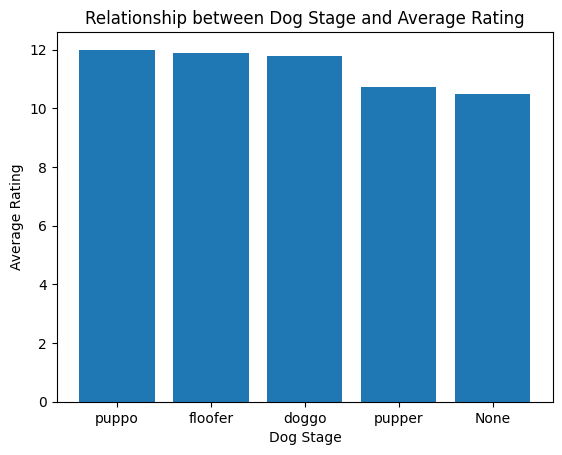

In [413]:
#Creating a bar chart
plt.bar(stage_ratings.index, stage_ratings.values)
plt.xlabel('Dog Stage')
plt.ylabel('Average Rating')
plt.title('Relationship between Dog Stage and Average Rating')
plt.show()

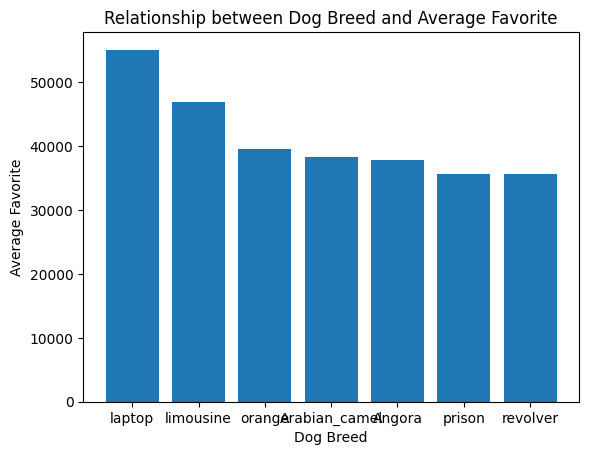

In [414]:
#Creating a bar chart
plt.bar(favorite_breed.head(7).index, favorite_breed.head(7).values)
plt.xlabel('Dog Breed')
plt.ylabel('Average Favorite')
plt.title('Relationship between Dog Breed and Average Favorite')
plt.show()

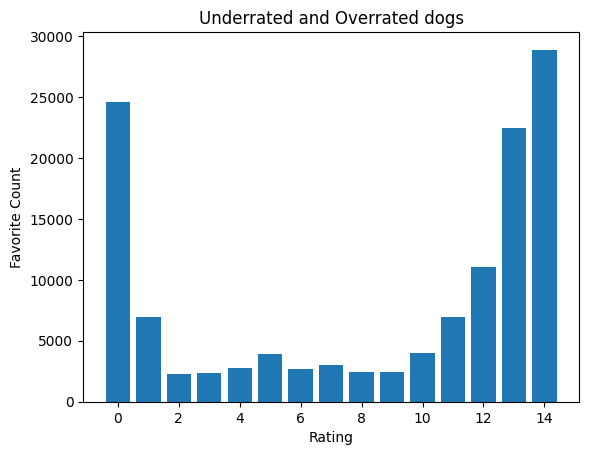

In [415]:
#Creating a bar chart
plt.bar(fav_rating.index, fav_rating.values)
plt.xlabel('Rating')
plt.ylabel('Favorite Count')
plt.title('Underrated and Overrated dogs')
plt.show()